<a href="https://colab.research.google.com/github/Renass/Yasuo_project/blob/transfer_res_net/classification/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import os
from google.colab import files
import torchvision
import glob
from torchvision import transforms
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import matplotlib
from matplotlib import pyplot as plt
import zipfile
from tqdm import tqdm
from PIL import Image
import cv2
import random
import glob
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


zip_path = '/content/drive/MyDrive/Colab_Notebooks/datasets/stm-data/stm-data.zip'
z = zipfile.ZipFile(zip_path, 'r')
z.extractall()
print(os.listdir())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['.config', 'drive', 'stm-data', 'sample_data']


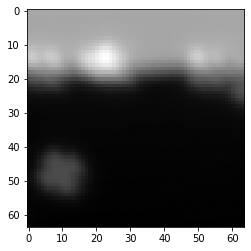

In [17]:
path = '/content/stm-data/JointDataset'
path2 = '/content/stm-data_image'

train_bad_dir = path + '/Train/bad'
train_good_dir = path + '/Train/good'
test_bad_dir = path + '/Test/bad'
test_good_dir = path + '/Test/good'

train_bad_dir2 = path2 + '/Train/bad'
train_good_dir2 = path2 + '/Train/good'
test_bad_dir2 = path2 + '/Test/bad'
test_good_dir2 = path2 + '/Test/good'

train_bad_names = glob.glob(train_bad_dir + '/*.npy')
train_good_names = glob.glob(train_good_dir + '/*.npy')
test_bad_names = glob.glob(test_bad_dir + '/*.npy')
test_good_names = glob.glob(test_good_dir + '/*.npy')

names = [train_bad_names, train_good_names, test_bad_names, test_good_names]
names2 = [train_bad_dir2, train_good_dir2, test_bad_dir2, test_good_dir2]


for i,set in enumerate(names):
    for j,img in enumerate(set):
        name = img
        img = np.load(img)
        img = torch.from_numpy(img)
        img = 255*(img - img.min())/(img.max()-img.min())
        img = img.numpy()
        img = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_GRAY2RGB)
        plt.imshow(img)
        cv2.imwrite(names2[i]+'/'+str(j)+'.jpg', img)

In [23]:
import shutil
zip_path = '/content/stm-data_image'
shutil.make_archive('1', 'zip', zip_path)

'/content/1.zip'